In [2]:
from fbprophet import Prophet
#輸入模型

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from sklearn.metrics import mean_absolute_error


In [30]:
dataset =pd.read_excel("C:/Users/User/Desktop/烏克蘭設備123.xlsx")
print (dataset)
#讀取烏克蘭空軍資料(戰鬥機和無人機)


           Date  飛機（戰鬥機和攻擊機）以及攻擊型無人機
0    2022-02-24                    2
1    2022-02-25                    3
2    2022-02-26                    3
3    2022-02-27                    3
4    2022-02-28                    5
..          ...                  ...
98   2022-06-02                   49
99   2022-06-03                   49
100  2022-06-04                   49
101  2022-06-05                   49
102  2022-06-06                   50

[103 rows x 2 columns]


In [32]:
dataset.head()
#列出前五筆資料

,Date,飛機（戰鬥機和攻擊機）以及攻擊型無人機
0,2022-02-24,2
1,2022-02-25,3
2,2022-02-26,3
3,2022-02-27,3
4,2022-02-28,5


In [44]:
print(dataset.shape)

(103, 2)


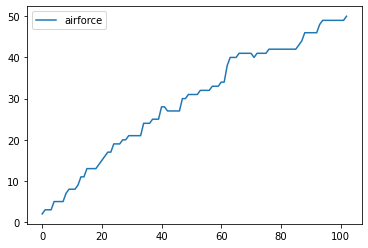

In [54]:
dataset =pd.read_excel("C:/Users/User/Desktop/烏克蘭設備123.xlsx")
from matplotlib import pyplot
from pylab import *
dataset.plot()
pyplot.show()
#資料線形圖(下方是時間、上方是損失累積數量)


In [62]:
dataset.columns = ['ds', 'y']
dataset['ds']= pd.to_datetime(dataset['ds'])
model = Prophet()
# fit the model
model.fit(dataset)
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 
#資料去擬合模型

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
forecast = model.predict(dataset)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-24,1.930030,0.558834,3.412423,1.930030,1.930030,0.060676,0.060676,0.060676,0.060676,0.060676,0.060676,0.0,0.0,0.0,1.990706
1,2022-02-25,2.580673,1.212969,3.994348,2.580673,2.580673,0.048889,0.048889,0.048889,0.048889,0.048889,0.048889,0.0,0.0,0.0,2.629562
2,2022-02-26,3.231317,1.800768,4.592567,3.231317,3.231317,-0.025476,-0.025476,-0.025476,-0.025476,-0.025476,-0.025476,0.0,0.0,0.0,3.205841
3,2022-02-27,3.881960,2.291487,5.144247,3.881960,3.881960,-0.157830,-0.157830,-0.157830,-0.157830,-0.157830,-0.157830,0.0,0.0,0.0,3.724130
4,2022-02-28,4.532604,3.019994,5.868047,4.532604,4.532604,-0.157643,-0.157643,-0.157643,-0.157643,-0.157643,-0.157643,0.0,0.0,0.0,4.374960


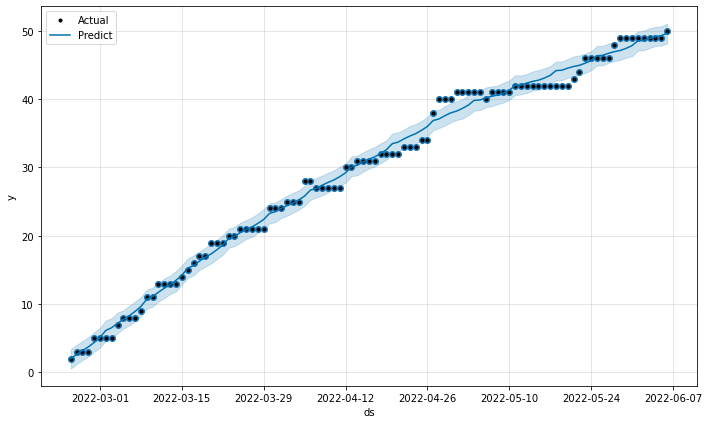

In [74]:
model.plot(forecast)
plt.scatter(x=dataset.ds, y=dataset.y)
plt.legend(['Actual', 'Predict'])
plt.show();
#對既有資料去預測

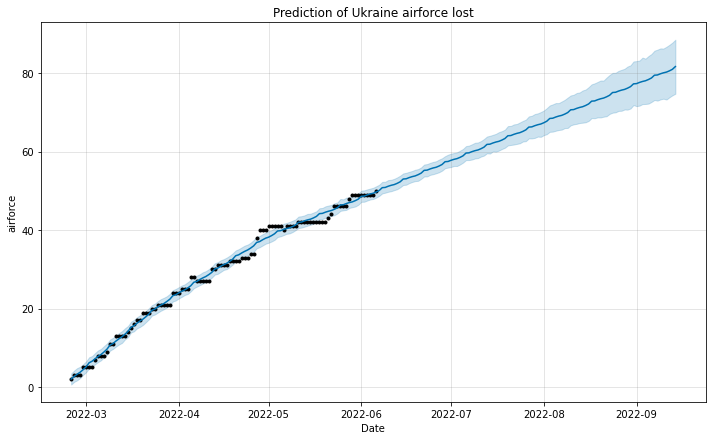

In [80]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet 模型
m.fit(dataset) # 使用所有數據擬合模型
future = m.make_future_dataframe(periods=100) #對未來60天去預測
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of Ukraine airforce lost")
plt.xlabel("Date")
plt.ylabel("airforce")
plt.show()#烏克蘭根據2021資料約有67台